In [ ]:
# 📘 Churn Prediction for ConnectSphere Telecom
print('Hello from YBI Foundation 🚀')

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/churn_project/TelecomCustomerChurn.csv'
df = pd.read_csv(file_path)

# To view first few rows
df.head()


,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (7043, 21)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

,0
customerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [8]:
# To convert 'Churn' column to binary (Yes = 1, No = 0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [9]:
# Obtaining categorical columns
cat_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", cat_cols.tolist())

# Obtaining numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", num_cols.tolist())


Categorical Columns: ['customerID', 'Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']
Numerical Columns: ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'Churn']


PART 2 – DATA PREPROCESSING

In [10]:
df.drop('customerID', axis=1, inplace=True)


In [28]:
# Converting to numeric, force errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Checking how many NaNs appeared
print("Missing values in TotalCharges after conversion:")
print(df['TotalCharges'].isnull().sum())

Missing values in TotalCharges after conversion:
0


In [12]:
# Drop rows with missing TotalCharges
df.dropna(inplace=True)

In [13]:
# Encoding all categorical columns (excluding target 'Churn')
df = pd.get_dummies(df, drop_first=True)

In [14]:
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

PART 3 – Build & Train the ANN Model

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [19]:
from tensorflow.keras import Input

# Define the model
model = Sequential()

# Input Layer
model.add(Input(shape=(X_train.shape[1],)))

# First Hidden Layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

# Second Hidden Layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))


In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6083 - loss: 0.6572 - val_accuracy: 0.8000 - val_loss: 0.4237
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7821 - loss: 0.4661 - val_accuracy: 0.8009 - val_loss: 0.4133
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7856 - loss: 0.4401 - val_accuracy: 0.8044 - val_loss: 0.4094
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8000 - loss: 0.4281 - val_accuracy: 0.8053 - val_loss: 0.4091
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7951 - loss: 0.4337 - val_accuracy: 0.8053 - val_loss: 0.4061
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8044 - loss: 0.4161 - val_accuracy: 0.8044 - val_loss: 0.4083
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8029 - loss: 0.4218 - val_accuracy: 0.8018 - val_loss: 0.4081
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8058 - loss: 0.4208 - val_accuracy: 0.

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7771 - loss: 0.4336
Test Accuracy: 0.7811


Visualize the training progress

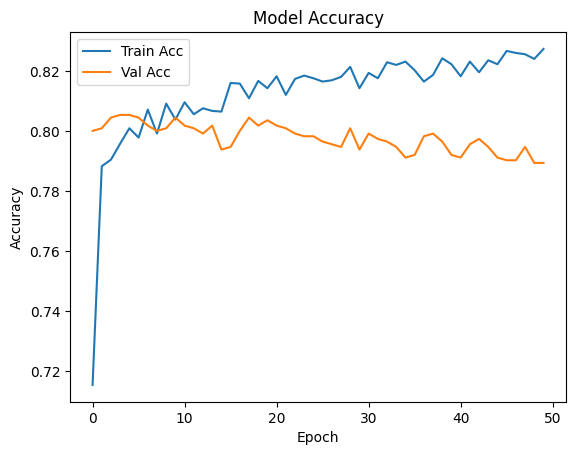

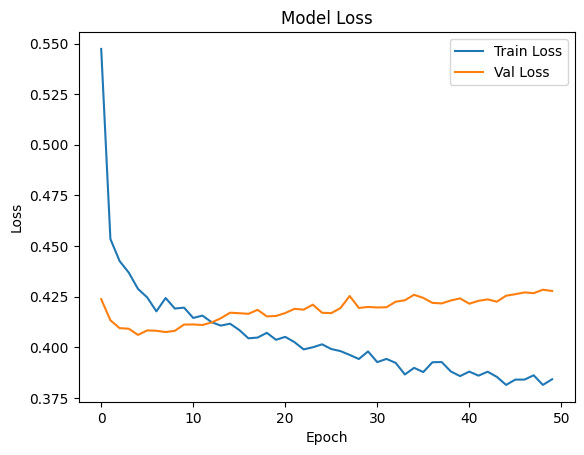

In [29]:
import matplotlib.pyplot as plt
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


PART 4 – Model Evaluation & Results

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7771 - loss: 0.4336
Test Accuracy: 0.7811


In [25]:
# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary output (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[920 113]
 [195 179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [27]:
# Create DataFrame with predicted probabilities
import numpy as np

risk_df = pd.DataFrame({
    'Churn Probability': y_pred_prob.flatten(),
    'Actual': y_test.values
})

# Sort by highest churn probability
risk_df_sorted = risk_df.sort_values(by='Churn Probability', ascending=False)

# View top 10 most at-risk customers
risk_df_sorted.head(10)


,Churn Probability,Actual
1080,0.968294,1
1376,0.959757,1
699,0.958091,1
667,0.946599,1
902,0.941896,1
437,0.938625,1
1149,0.933523,1
439,0.931659,1
984,0.930650,1
91,0.927130,1
